# 영등포구 소재 지하철역

In [1]:
import folium
import pandas as pd

In [2]:
df = pd.read_csv('data/영등포소재 지하철역2.csv')
df

,이름,주소,위도,경도
0,영등포역,서울특별시 영등포구 경인로 지하843 (영등포동3가),37.516463,126.906659
1,신도림역,서울특별시 구로구 경인로 625 (신도림동),37.507084,126.884719
2,당산역,서울특별시 영등포구 당산로 229 (당산동6가),37.534957,126.902731
3,여의도역,서울특별시 영등포구 여의나루로 지하40 (여의도동),37.521842,126.924485
4,영등포구청역,서울특별시 영등포구 당산로 지하121 (당산동3가),37.525700,126.896627


In [3]:
map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=14)  # Center position
for i in df.index:
    folium.Marker(
    location=[df.위도[i], df.경도[i]],            
    tooltip= df.이름[i],
    popup=folium.Popup(df.주소[i], max_width=200)
).add_to(map)
    
title_html = '<h3 align="center" style="font-size:20px">영등포소재 주요 지하철역</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

In [5]:
df['color'] = ['red', 'blue', 'green', 'violet', 'orange']
df

,이름,주소,위도,경도,color
0,영등포역,서울특별시 영등포구 경인로 지하843 (영등포동3가),37.516463,126.906659,red
1,신도림역,서울특별시 구로구 경인로 625 (신도림동),37.507084,126.884719,blue
2,당산역,서울특별시 영등포구 당산로 229 (당산동6가),37.534957,126.902731,green
3,여의도역,서울특별시 영등포구 여의나루로 지하40 (여의도동),37.521842,126.924485,violet
4,영등포구청역,서울특별시 영등포구 당산로 지하121 (당산동3가),37.525700,126.896627,orange



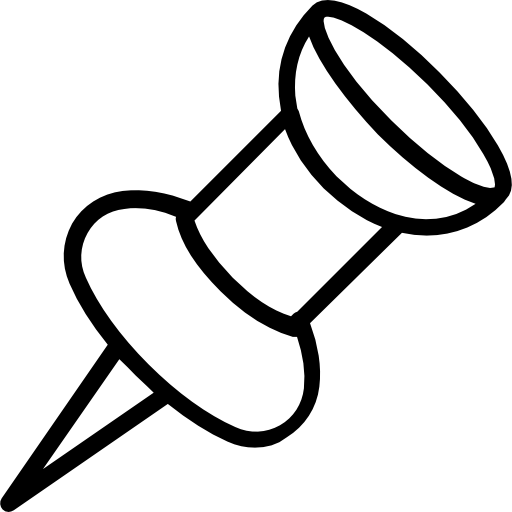

In [12]:
map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=14)  # Center position
for i in df.index:
    folium.Circle(
    location=[df.위도[i], df.경도[i]],            
    tooltip= df.이름[i],
    popup=folium.Popup(df.주소[i], max_width=200),
    radius=100, color=df.color[i], fill=True
    ).add_to(map)
    folium.Marker(
    location=[df.위도[i], df.경도[i]], 
    icon= folium.DivIcon(icon_size=(80,20), icon_anchor=(20,0),
                         html=f'<span style="font-size: 10pt">{df.이름[i]}</span>')
    ).add_to(map)

folium.Marker(
    location=[df.위도.mean(), df.경도.mean()],
    icon=folium.CustomIcon('data/pushpin.png', icon_size=(30,30))
).add_to(map)
    
title_html = '<h3 align="center" style="font-size:20px">영등포소재 주요 지하철역</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map